<a href="https://colab.research.google.com/github/Jey-Sankar-Sai-Pinjala/mobius-strip/blob/main/mobius_strip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Surface Area ≈ 0.0010
Edge Length ≈ 12.6270


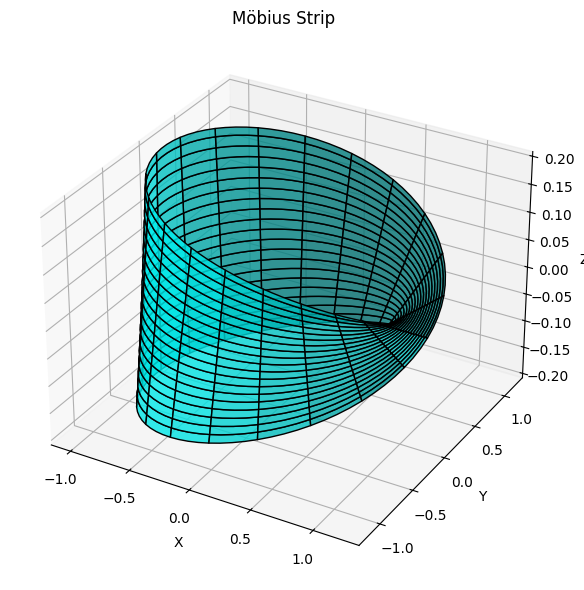

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class MobiusStrip:
    def __init__(self, R=1.0, w=0.2, n=600):
        self.R = R
        self.w = w
        self.n = n
        self.u = np.linspace(0, 2 * np.pi, n)
        self.v = np.linspace(-w / 2, w / 2, n)
        self.U, self.V = np.meshgrid(self.u, self.v)
        self.X, self.Y, self.Z = self.compute_mesh()

    def compute_mesh(self):
        U, V = self.U, self.V
        X = (self.R + V * np.cos(U / 2)) * np.cos(U)
        Y = (self.R + V * np.cos(U / 2)) * np.sin(U)
        Z = V * np.sin(U / 2)
        return X, Y, Z

    def compute_surface_area(self):
        # Numerical approximation of surface area using the surface integral formula
        du = 2 * np.pi / (self.n - 1)
        dv = self.w / (self.n - 1)

        # Partial derivatives wrt u and v
        Xu = np.gradient(self.X, axis=1)
        Yu = np.gradient(self.Y, axis=1)
        Zu = np.gradient(self.Z, axis=1)

        Xv = np.gradient(self.X, axis=0)
        Yv = np.gradient(self.Y, axis=0)
        Zv = np.gradient(self.Z, axis=0)

        # Cross product of partials (Xu × Xv)
        cross_x = Yu * Zv - Zu * Yv
        cross_y = Zu * Xv - Xu * Zv
        cross_z = Xu * Yv - Yu * Xv

        dA = np.sqrt(cross_x**2 + cross_y**2 + cross_z**2)
        surface_area = np.sum(dA) * du * dv
        return surface_area

    def compute_edge_length(self):
        # Edge path is v = ±w/2 along u ∈ [0, 2π]
        upper_v = self.w / 2
        u_vals = self.u

        def edge_points(sign=1):
            x = (self.R + sign * upper_v * np.cos(u_vals / 2)) * np.cos(u_vals)
            y = (self.R + sign * upper_v * np.cos(u_vals / 2)) * np.sin(u_vals)
            z = sign * upper_v * np.sin(u_vals / 2)
            return np.vstack((x, y, z)).T

        edge1 = edge_points(sign=1)
        edge2 = edge_points(sign=-1)

        def path_length(points):
            diff = np.diff(points, axis=0)
            seg_lengths = np.linalg.norm(diff, axis=1)
            return np.sum(seg_lengths)

        return path_length(edge1) + path_length(edge2)

    def plot(self):
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(self.X, self.Y, self.Z, rstride=4, cstride=4, color='cyan', edgecolor='k', alpha=0.8)
        ax.set_title("Möbius Strip")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        plt.tight_layout()
        plt.show()

# Example usage:
if __name__ == "__main__":
    mobius = MobiusStrip(R=1.0, w=0.4, n=80)
    area = mobius.compute_surface_area()
    edge_len = mobius.compute_edge_length()
    print(f"Surface Area ≈ {area:.4f}")
    print(f"Edge Length ≈ {edge_len:.4f}")
    mobius.plot()
